<h1 align = 'center'>Feature Engineering --- Missing Values</h1>

### End of Distribution imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<AxesSubplot: >

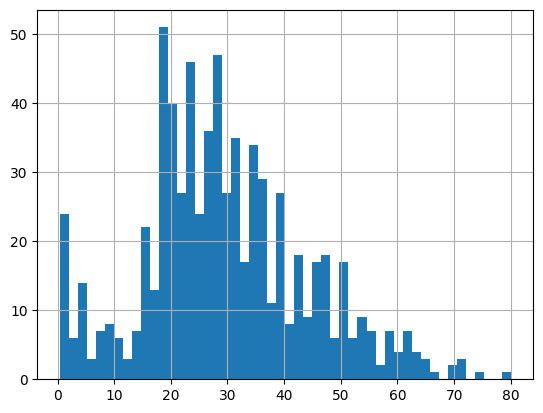

In [4]:
df.Age.hist(bins = 50)

#### Normal Distribution 

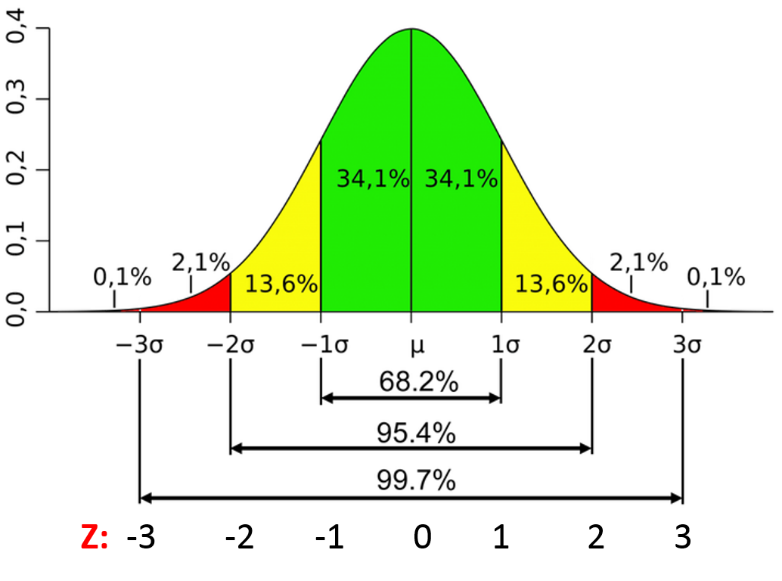

In [8]:
extreme = df['Age'].mean() + 3*df['Age'].std()
extreme 

73.27860964406095

C:\Users\Neeta Devke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age'>

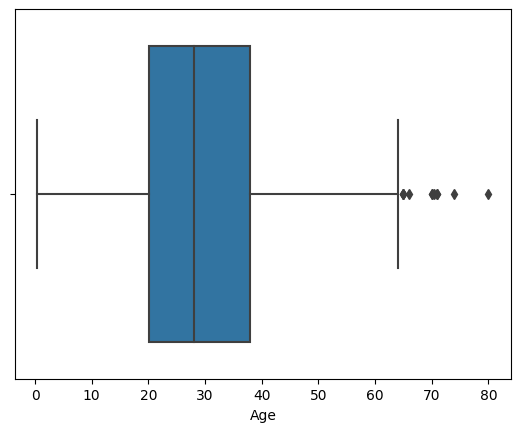

In [7]:
sns.boxplot('Age', data = df)

In [11]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [12]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [13]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot: >

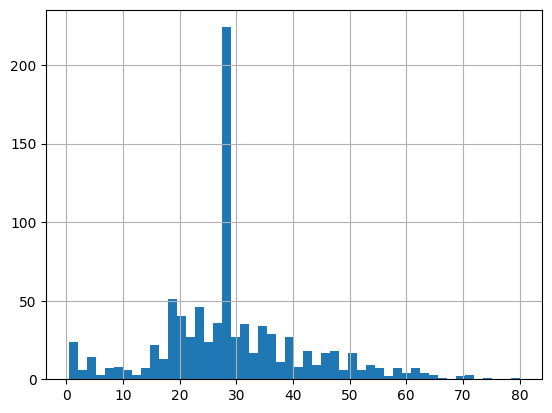

In [15]:
df['Age'].hist(bins = 50)

<AxesSubplot: >

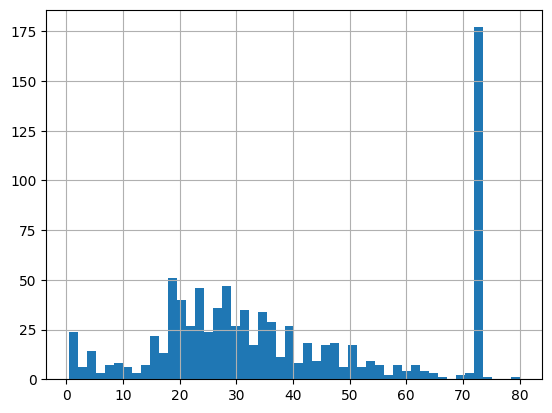

In [16]:
df['Age_end_distribution'].hist(bins = 50)

C:\Users\Neeta Devke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age_end_distribution'>

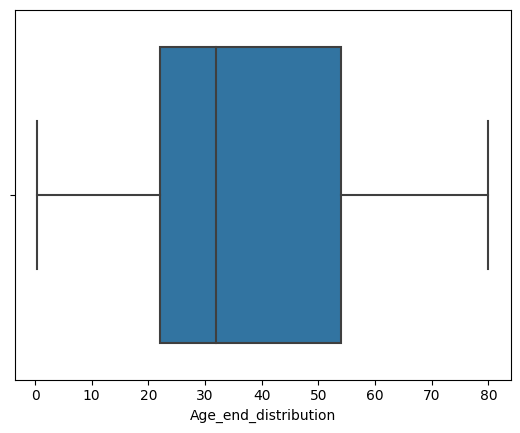

In [17]:
sns.boxplot('Age_end_distribution', data = df)

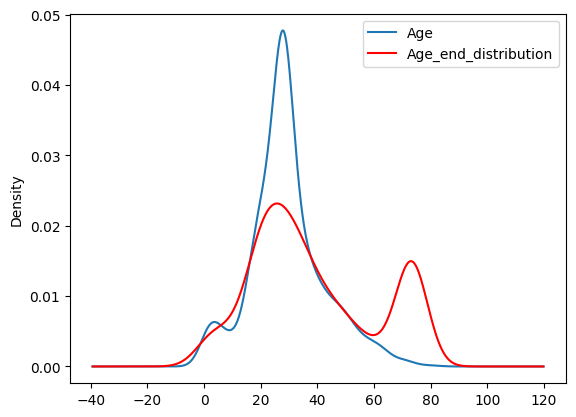

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
- Easy to Implement
- Captures the Importance of missingness if there is one

#### Disadvantages
- Distorts the original distribution of the variable
- If missingness is not important, it may mask the predictive power of the original variable by distoring its distribution
- If the number of NA is big, it will mask true outliers in the distribution
- If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step in feature engineering 